###Bonus SQL Homework

In [30]:
import pandas as pd
import psycopg2

In [31]:
dbname='EmployeesSQL'
my_port=5432
connection = psycopg2.connect(host="localhost", port = my_port, database=dbname, user="postgres", password='postgres')

In [32]:
# Create a cursor object
cur = connection.cursor()

# A sample query of all data from the "vendors" table in the "suppliers" database
cur.execute("""SELECT salary FROM salaries""")
query_results = cur.fetchall()
print(len(query_results))


300024


In [33]:
df = pd.DataFrame(query_results)
df

,0
0,60117
1,65828
2,40006
3,40054
4,78228
...,...
300019,40000
300020,58058
300021,49597
300022,40000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd06fadafa0>]],
      dtype=object)

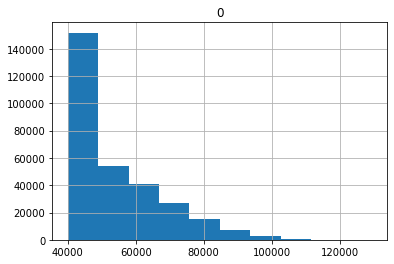

In [34]:
df.hist()

In [35]:
connection.rollback()
cur2 = connection.cursor()
cur2.execute("""SELECT t.title, AVG(s.salary)
FROM titles as t
JOIN employees as e
ON e.emp_title_id = t.title_id
JOIN salaries as s
ON e.emp_no = s.emp_no
GROUP BY t.title
ORDER BY AVG(s.salary) DESC""")
query_results2 = cur2.fetchall()
print(query_results2)


[('Senior Staff', Decimal('58550.172704359929')), ('Staff', Decimal('58465.382850331521')), ('Manager', Decimal('51531.041666666667')), ('Technique Leader', Decimal('48582.896091893319')), ('Assistant Engineer', Decimal('48564.434447300771')), ('Engineer', Decimal('48535.336511426337')), ('Senior Engineer', Decimal('48506.799871095788'))]


In [36]:
print(query_results2)
df2 = pd.DataFrame(data = query_results2, columns=["Title","Avg Salary"], dtype=float)
df2

[('Senior Staff', Decimal('58550.172704359929')), ('Staff', Decimal('58465.382850331521')), ('Manager', Decimal('51531.041666666667')), ('Technique Leader', Decimal('48582.896091893319')), ('Assistant Engineer', Decimal('48564.434447300771')), ('Engineer', Decimal('48535.336511426337')), ('Senior Engineer', Decimal('48506.799871095788'))]


,Title,Avg Salary
0,Senior Staff,58550.172704
1,Staff,58465.382850
2,Manager,51531.041667
3,Technique Leader,48582.896092
4,Assistant Engineer,48564.434447
5,Engineer,48535.336511
6,Senior Engineer,48506.799871


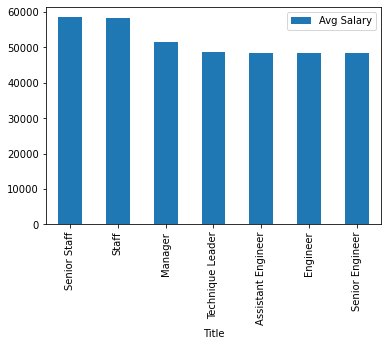

In [37]:
df2.plot.bar(x="Title",y="Avg Salary")

In [38]:
cur3 = connection.cursor()
cur3.execute("""SELECT e.emp_no, e.first_name, e.last_name, e.sex, t.title, s.salary
FROM titles as t
JOIN employees as e
ON e.emp_title_id = t.title_id
JOIN salaries as s
ON e.emp_no = s.emp_no
WHERE e.emp_no = 499942""")
query_results3 = cur3.fetchall()
print(query_results3)


[(499942, 'April', 'Foolsday', 'F', 'Technique Leader', 40000)]
